# Fresnel calculator 
- author: Meng Gao, meng.gao@nasa.gov
- github: https://github.com/kiwiriver/playground
- 09/05/2024 converted into python
- 05/14/2012 originally written in javascript at TAMU

### Define the mathematical operation of complex numbers

In [21]:
import cmath

class Complex:
    def __init__(self, real, imaginary):
        self.real = real
        self.imaginary = imaginary

    def magnitude(self):
        return (self.real**2 + self.imaginary**2) ** 0.5

    def negative(self):
        return Complex(-self.real, -self.imaginary)

    def __str__(self):
        return f"({self.real},{self.imaginary})"

    def __repr__(self):
        return self.__str__()

    def valueOf(self):
        return self.real

    @staticmethod
    def add(a, b):
        return Complex(a.real + b.real, a.imaginary + b.imaginary)

    @staticmethod
    def subtract(a, b):
        return Complex(a.real - b.real, a.imaginary - b.imaginary)

    @staticmethod
    def multiply(a, b):
        real_part = a.real * b.real - a.imaginary * b.imaginary
        imaginary_part = a.real * b.imaginary + a.imaginary * b.real
        return Complex(real_part, imaginary_part)

    @staticmethod
    def divide(a, b):
        denom = b.real**2 + b.imaginary**2
        real_part = (a.real * b.real + a.imaginary * b.imaginary) / denom
        imaginary_part = (a.imaginary * b.real - a.real * b.imaginary) / denom
        return Complex(real_part, imaginary_part)

    @staticmethod
    def modsquare(a):
        return a.real**2 + a.imaginary**2

# Predefined constants
Complex.zero = Complex(0, 0)
Complex.one = Complex(1, 0)
Complex.i = Complex(0, 1)


### Define Fresnel reflection and Mueller matrix

In [22]:
import numpy as np

def fresnel(th1, n1, n2r, n2i):
    th1 = np.radians(th1)  # Convert incident angle to radians
    nc11 = n1 * np.cos(th1)
    alpha = n2r**2 - n2i**2 - n1**2 * np.sin(th1)**2
    u2 = np.sqrt(0.5 * (alpha + np.sqrt(alpha**2 + (2 * n2r * n2i)**2)))
    v2 = np.sqrt(0.5 * (-alpha + np.sqrt(alpha**2 + (2 * n2r * n2i)**2)))
    epsilon = Complex(n2r**2 - n2i**2, 2 * n2r * n2i)

    rs = Complex.divide(Complex(nc11 - u2, -v2), Complex(nc11 + u2, v2))
    rp = Complex.divide(Complex(epsilon.real * np.cos(th1) - n1 * u2, epsilon.imaginary * np.cos(th1) - n1 * v2),
                        Complex(epsilon.real * np.cos(th1) + n1 * u2, epsilon.imaginary * np.cos(th1) + n1 * v2))

    m11 = (Complex.modsquare(rp) + Complex.modsquare(rs)) / 2
    m12 = (Complex.modsquare(rp) - Complex.modsquare(rs)) / 2
    rs_conj = Complex(rs.real, -rs.imaginary)
    m33 = Complex.multiply(rp, rs_conj).real
    m34 = Complex.multiply(rp, rs_conj).imaginary

    return {"rp": rp, "rs": rs, "m11": m11, "m12": m12, "m33": m33, "m34": m34}


### Plotting the Results in Jupyter Notebook

In [23]:
import matplotlib.pyplot as plt

def plot_mueller(n1, n2r, n2i):
    angles = np.arange(0, 91, 1)
    line11, line12, line33, line34 = [], [], [], []

    for i in angles:
        f2 = fresnel(i, n1, n2r, n2i)
        line11.append(f2['m11'])
        line12.append(f2['m12'])
        line33.append(f2['m33'])
        line34.append(f2['m34'])

    plt.figure(figsize=(12, 8))
    
    plt.subplot(221)
    plt.plot(angles, line11, label='m11')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m11')
    plt.legend()

    plt.subplot(222)
    plt.plot(angles, line12, label='m12')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m12')
    plt.legend()

    plt.subplot(223)
    plt.plot(angles, line33, label='m33')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m33')
    plt.legend()

    plt.subplot(224)
    plt.plot(angles, line34, label='m34')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m34')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [24]:
import matplotlib.pyplot as plt

def plot_mueller_ratio(n1, n2r, n2i):
    angles = np.arange(0, 91, 1)
    line11, line12, line33, line34 = [], [], [], []

    for i in angles:
        f2 = fresnel(i, n1, n2r, n2i)
        line11.append(f2['m11'])
        line12.append(f2['m12']/f2['m11'])
        line33.append(f2['m33']/f2['m11'])
        line34.append(f2['m34']/f2['m11'])

    plt.figure(figsize=(12, 8))
    
    plt.subplot(221)
    plt.plot(angles, line11, label='m11')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m11')
    plt.legend()

    plt.subplot(222)
    plt.plot(angles, line12, label='m12/m11')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m12/m11')
    plt.legend()

    plt.subplot(223)
    plt.plot(angles, line33, label='m33/m11')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m33/m11')
    plt.legend()

    plt.subplot(224)
    plt.plot(angles, line34, label='m34/m11')
    plt.xlabel('Incident Angle (Degrees)')
    plt.ylabel('m34/m11')
    plt.legend()

    plt.tight_layout()
    plt.show()




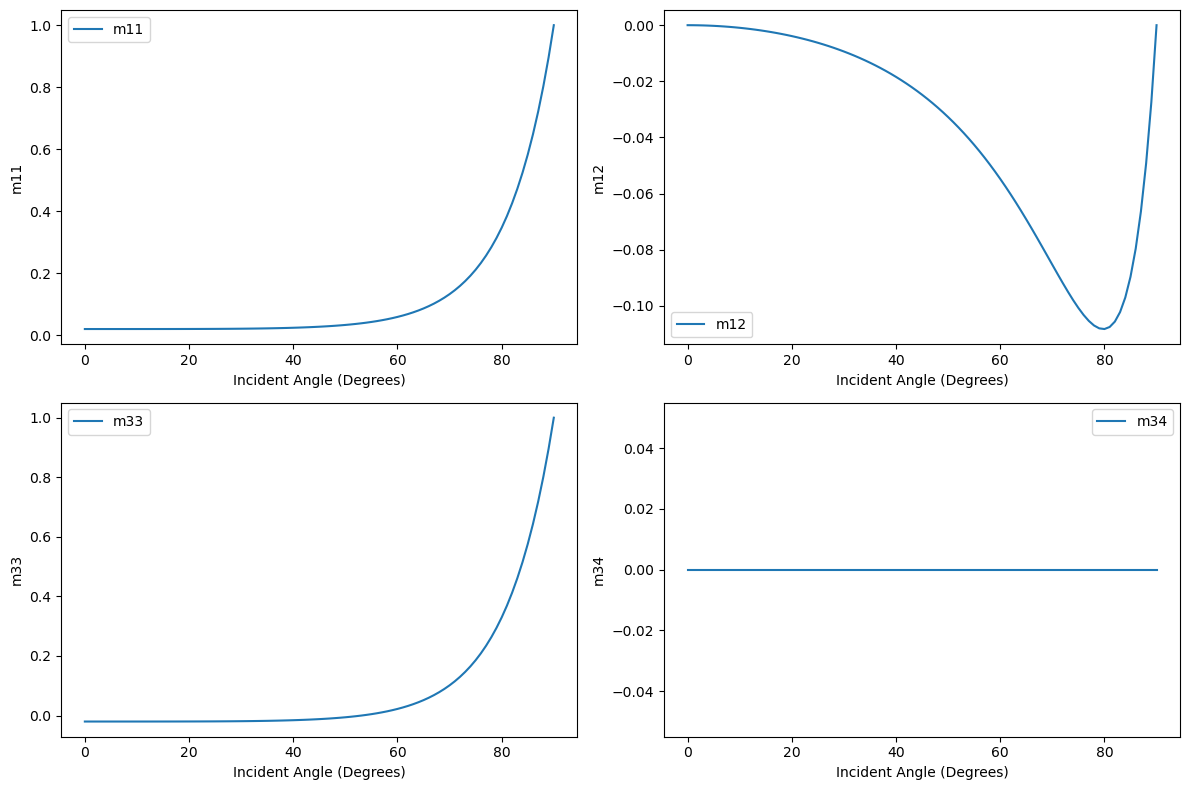

In [25]:
# Example usage
plot_mueller(1, 1.33, 0)

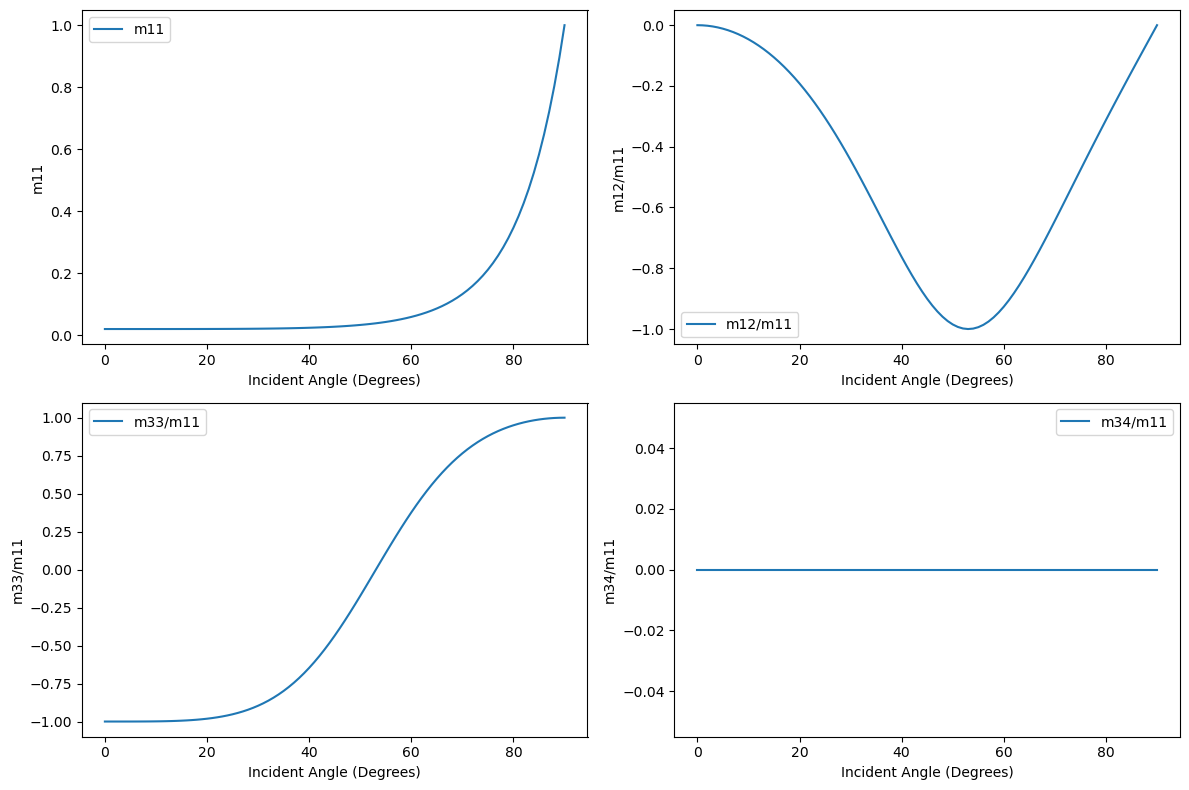

In [26]:
# Example usage
plot_mueller_ratio(1, 1.33, 0)

### Running the calculation at a fixed incident angle

In [27]:
th1 = 0
th1 = 35.29
n1 = 1
n2r = 1.33
n2i = 0 #1
result = fresnel(th1, n1, n2r, n2i)

print("Complex reflection coefficients (for electric field):")
print("p-pol:", result['rp'])
print("s-pol:", result['rs'])

print("\nMueller matrix elements:") 
print("m11:", result['m11']) 
print("m12:", result['m12']) 
print("m33:", result['m33']) 
print("m34:", result['m34'])

print("m11:", result['m11']) 
print("m12/m11:", result['m12']/result['m11']) 
print("m33/m11:", result['m33']/result['m11']) 
print("m34/m11:", result['m34']/result['m11'])


Complex reflection coefficients (for electric field):
p-pol: (0.09306794163832985,0.0)
s-pol: (-0.1895215898211062,0.0)

Mueller matrix elements:
m11: 0.022290037384557596
m12: -0.013628395623762026
m33: -0.0176383842606742
m34: -0.0
m11: 0.022290037384557596
m12/m11: -0.6114119679854686
m33/m11: -0.7913124575059693
m34/m11: -0.0


### rotation of mueller matrix (to be continued)